In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.RandomState(1)

### Examples of More and Less Intuitive ColorMaps

C:\Users\asliter\AppData\Local\Continuum\Anaconda2\envs\py36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


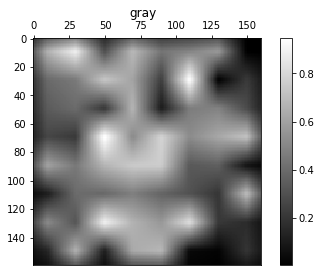

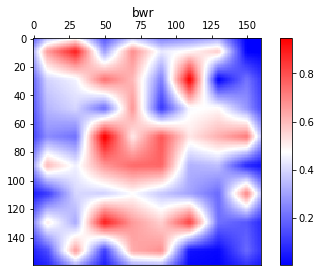

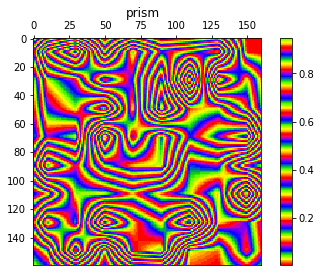

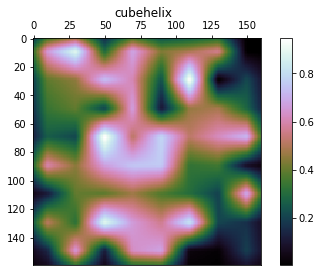

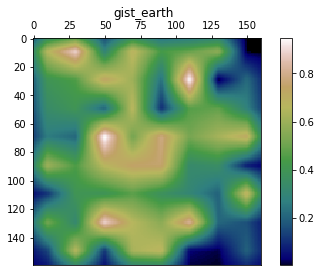

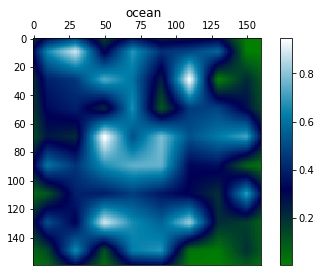

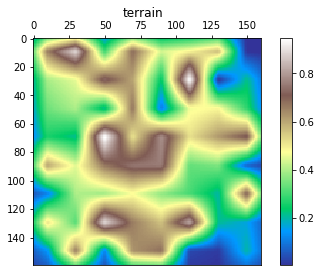

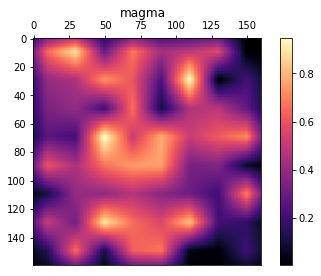

In [35]:
from skimage import transform,io
img = transform.resize(np.random.random(size=(8,8)), (160,160), anti_aliasing=True) #Making a random heatmap-y image
for colormap in ['gray','bwr', 'prism', 'cubehelix', 'gist_earth', 'ocean', 'terrain', 'magma']:
    fig, ax = plt.subplots()
    cax = ax.imshow(img, cmap=colormap)
    fig.suptitle(colormap, va='bottom')
    fig.colorbar(cax)
    plt.tight_layout(pad=2)
    ax.xaxis.tick_top()

### Spectral Curves with their RGB Representations

Unfortunately this won't produce the nice, smooth, plausible curves from the presentation without the proprietary data, but it'll definitely show the principle of an audience centered plot.

In [3]:
from colormath.color_objects import LabColor, SpectralColor, sRGBColor
from colormath.color_conversions import convert_color

fakespectralvalues = np.random.random(size=36) #Implausible Ink Reflectance Curve
fakecolor = SpectralColor(*fakespectralvalues)
fakeRGB = convert_color(fakecolor, sRGBColor)
clampedRGB = tuple([v for v in [fakeRGB.clamped_rgb_r, fakeRGB.clamped_rgb_g, fakeRGB.clamped_rgb_b]])

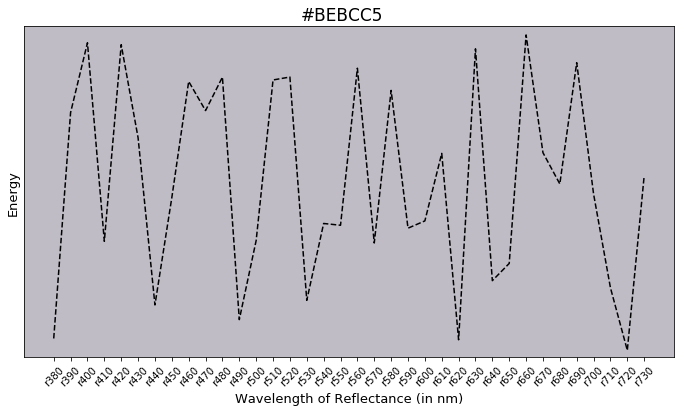

In [4]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(fakespectralvalues, linestyle='--', color='black')
ax.set_facecolor(clampedRGB)
ax.set_xticks(np.arange(len(fakespectralvalues)))
ax.set_xticklabels(['r{}'.format(f) for f in np.arange(380,749,10)], rotation=45)
ax.set_yticks([])
hexRGB = [hex(int(v*255)).split('x')[-1].upper() for v in list(clampedRGB)]
title = "#{}{}{}".format(*hexRGB)
fig.suptitle(title, fontsize=17)
ax.set_xlabel("Wavelength of Reflectance (in nm)", fontsize=13)
ax.set_ylabel("Energy", fontsize=13)
ax.set_ylim(0,1)
fig.tight_layout(pad=2.5)

### "Sales" Data with full annotation

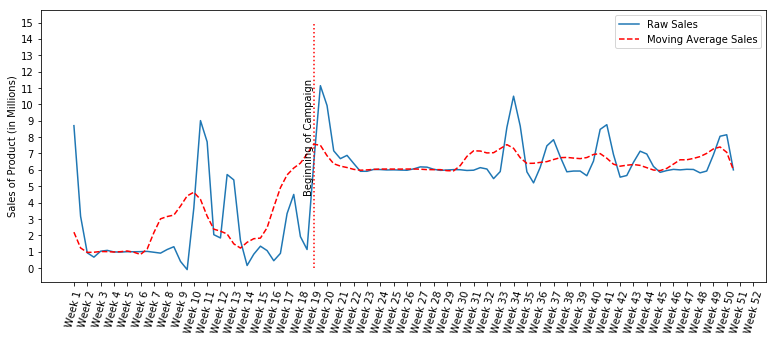

In [5]:
from scipy.interpolate import interp1d

x = np.zeros(52)
x[np.random.randint(0,high=52,size=15)] = np.random.randint(0,100,size=15)
x[20:]+=50
f = interp1d(np.arange(52),x, kind='cubic')
fig, ax = plt.subplots(figsize=(13,5))
ax.set_xticklabels(['Week {}'.format(week) for week in np.arange(1,53)], rotation=75)
ax.set_xticks(np.arange(0,104,2))
y = f(np.linspace(0,51,num=100))
ax.plot(y, label='Raw Sales')
ax.plot([y[i:i+8].mean() for i in np.arange(len(y))], linestyle="--", color='red', label='Moving Average Sales')
ax.set_yticks(np.arange(-10,150,10))
ax.set_yticklabels(np.arange(0,16))
ax.set_ylabel("Sales of Product (in Millions)")
ax.plot([36]*2, [-10,140], linestyle=':', color='red')
ax.annotate("Beginning of Campaign", xy=(36,70), rotation=90, va='center', ha='right')
ax.legend()

### "Horse Race Plot"

This is something I've invented for a particular need at Digimarc.  I used the concept of a stacked bar chart to show the contributions each item made to how long a whole checkout basket took to checkout under three conditions.  I've included sample data so your example will look a lot like mine.

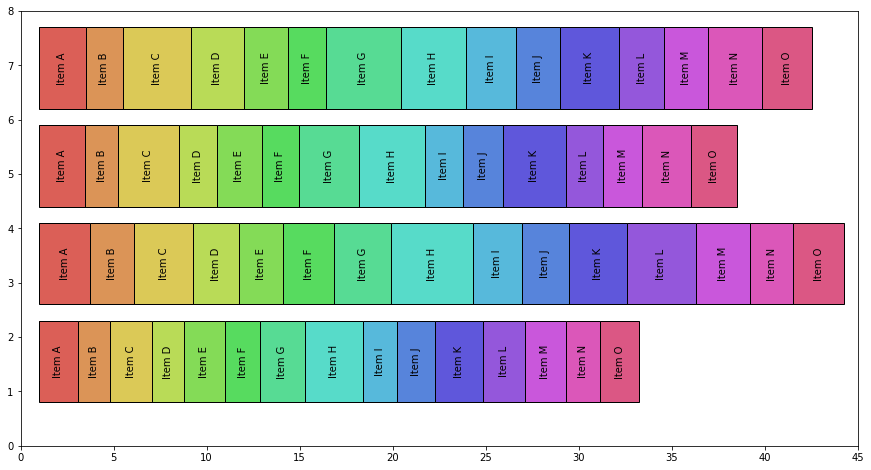

In [22]:
from matplotlib.patches import Rectangle
import seaborn as sns
itemnames = ["Item {}".format(letter) for letter in "ABCDEFGHIJKLMNO"]
colordict = {item:color for item,color in zip(np.arange(15),sns.color_palette('hls', 15))}
data = np.array([[2.50104505, 1.97908108, 3.65982883, 2.87377477, 2.37040541,
        2.02390991, 4.0214955 , 3.52415315, 2.68863063, 2.36159091,
        3.16383784, 2.43176577, 2.36086486, 2.87771171, 2.72205405],
       [2.47787387, 1.76491892, 3.26008108, 2.07262727, 2.37778378,
        2.01293694, 3.23402703, 3.54231532, 2.05742342, 2.13234234,
        3.37227027, 2.00126126, 2.12443243, 2.63789189, 2.47263063],
       [2.7398018 , 2.37072973, 3.15345045, 2.50064865, 2.35436036,
        2.74922523, 3.0642973 , 4.3869009 , 2.63371296, 2.50707207,
        3.12109009, 3.73164545, 2.91972973, 2.31585586, 2.70234234],
       [2.07047748, 1.7459375 , 2.2515625 , 1.70035714, 2.23940179,
        1.85270536, 2.40448214, 3.16253571, 1.81520536, 2.04954464,
        2.59301786, 2.243625  , 2.17160714, 1.87461607, 2.09152679]])
fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlim(0,45)
ax.set_ylim(0,8)
y = 6.2
height = 1.5
for i in range(4):
    x = 1
    label = iter(itemnames)
    for j in range(15):
        width = data[i,j]
        ax.add_artist(Rectangle((x,y), width,height, facecolor=colordict[j]))
        ax.add_artist(Rectangle((x,y), width,height, edgecolor='black', fill=None))
        ax.annotate(label.__next__(), xy=(x+width/2,y+height/2), rotation=90, va='center',ha='center')
        x += width
    y-=1.8

In [15]:
label = iter(itemnames)